<a href="https://colab.research.google.com/github/bahramiofficial/uniProject/blob/master/cancer_classifiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

# np.seterr(divide='ignore', invalid='ignore')

In [4]:
 df = pd.read_csv('/content/data_cancer.csv', header=None)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.describe()

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ed47ab510>,
      dtype=object)

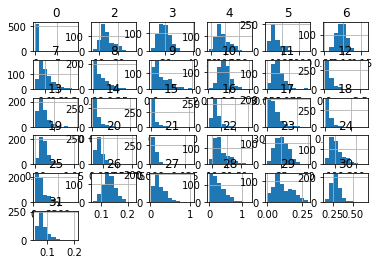

In [11]:
df.hist()

In [12]:
df.corr()

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
2,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
3,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
4,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
5,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
6,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
7,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
8,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
9,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
10,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [29]:
target = df[1].map({'M': 0, 'B': 1})
data = df.drop(columns=df.columns[[0, 1, 31]], axis=1)

In [14]:
def showData(target, data):
    sns.countplot(target, label="Count", palette="muted")
    benign, maliganat = target.value_counts()
    print("{0} people have benign cancer and {1} people have malignant one ".format(benign, maliganat))
    plt.show()

In [15]:
def splitData(target, data):
    return train_test_split(data, target, test_size=0.3, random_state=0, stratify=target)



In [16]:
def NormailizeAndValidationTrain(train_index, val_index, x_train, y_train):
    x_train_o, x_val_o = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    standardscaler = StandardScaler()
    x_train = standardscaler.fit_transform(x_train_o)
    x_val = standardscaler.fit_transform(x_val_o)

    return x_train, y_train, x_val, y_val

In [17]:
def PltRoc(model, xVal, yVal):
    y_score = model.predict(xVal)
    fpr, tpr, thresholds = roc_curve(yVal, y_score)
    roc_acu = auc(fpr, tpr)

    plt.title('recever opration characteroisc')
    plt.plot(fpr, tpr, 'b', label='AUC = 0.2f' % roc_acu)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'k:')
    plt.xlabel('false positon rate (1 - spencificity)')
    plt.ylabel('true positive rate (specificity)')
    plt.show()

In [18]:
def PltTestRoc(model, x_test_N, y_test, y_pred):
    y_score = model.predict(x_test_N)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_acu = auc(fpr, tpr)

    plt.title('recever opration characteroisc')
    plt.plot(fpr, tpr, 'b', label='AUC = 0.2f' % roc_acu)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'k:')
    plt.xlabel('false positon rate (1 - spencificity)')
    plt.ylabel('true positive rate (specificity)')
    plt.show()

In [19]:
def PltConfusionMatrix(model, xVal, yVal):
    plot_confusion_matrix(model, xVal, yVal)
    plt.show()

In [20]:
def KNNClassifier(target, data, train_index, val_index, skf, n_fold, x_train, y_train):
    x_train, y_train, x_val, y_val = NormailizeAndValidationTrain(train_index, val_index, x_train, y_train)

    # compute Best Number of Neighbors
    knn_clf = KNeighborsClassifier()  # knn create object
    param_grid = {'n_neighbors': np.arange(1, 25)}
    knn_gscv = GridSearchCV(knn_clf, param_grid, cv=5)
    knn_gscv.fit(x_train, y_train)

    best_k = knn_gscv.best_params_['n_neighbors']

    # knn classifier
    knn_clf = KNeighborsClassifier(n_neighbors=best_k)
    model_knn = Pipeline([
        ('reduce_dim', PCA()),
        ('knn', knn_clf)
    ])

    model_knn.fit(x_train, y_train)
    y_pred_k = model_knn.predict(x_val)

    global KNNModel
    KNNModel = model_knn

    # Accuracy and best neighbour
    print('The best number of neighbour is {0} with {1} accuracy'.format(
        str(knn_gscv.best_params_['n_neighbors']),
        str(accuracy_score(y_val, y_pred_k))

    ))

    Accuracy_knn  = accuracy_score(y_val, y_pred_k)

    print('\n *KNN Confusion Matrix')
    PltConfusionMatrix(model_knn, x_val, y_val)

    print('\n *KNN Confusion Matrix')
    PltRoc(model_knn, x_val, y_val)


In [21]:
def GNBClassifier( target, data, train_index, val_index, skf,currentFold, x_train, y_train):
    x_train, y_train, x_val, y_val = NormailizeAndValidationTrain(train_index, val_index, x_train, y_train )

    #Gussian Naice Bayse

    gnb_clf = GaussianNB()
    model_gnb = Pipeline([
        ('reduce_dim', PCA()),
        ('gnb', gnb_clf)
    ])

    model_gnb.fit(x_train,y_train)
    y_pred_g =  model_gnb.predict(x_val)

    global GNBModel
    GNBModel = model_gnb

    #accuracy

    print('\n Naive Bayes accuracy : {0}'.format(
         accuracy_score(y_val, y_pred_g)
    ))


    Accuracy_gnb = accuracy_score(y_val, y_pred_g)

    print('\n *GNB Confusion Matrix')
    PltConfusionMatrix(model_gnb, x_val, y_val)

    print('\n\n*GNB ROC')
    PltRoc(model_gnb, x_val, y_val)



In [22]:
def SVMClassifier(target, data, train_index, val_index, skf,currentFold, x_train, y_train):
    x_train, y_train, x_val, y_val = NormailizeAndValidationTrain(train_index, val_index, x_train, y_train )

    svc_clf = SVC(kernel='linear', C=1, probability=True)

    #pipline Pca
    model_svc = Pipeline([
        ('reduce_dim' , PCA()),
        ('svc',svc_clf)
    ])

    model_svc.fit(x_train, y_train)
    y_pred_s = model_svc.predict(x_val)

    global SVCModel
    SVCModel = model_svc

    # Accuracy and best neighbour
    print('\n SVC  accuracy : {0}'.format(
        accuracy_score(y_val, y_pred_s)
    ))


    Accuracy_svc = accuracy_score(y_val, y_pred_s)

    print('\n\n*SVC Confudion Matrix')
    PltConfusionMatrix(model_svc, x_val, y_val)

    print('\n\n*SVC ROC')
    PltRoc(model_svc, x_val, y_val)



In [23]:
def MDDClassifier(target, data, train_index, val_index, skf,currentFold, x_train, y_train):
    x_train, y_train, x_val, y_val = NormailizeAndValidationTrain(train_index, val_index, x_train, y_train )

    mmd_clf = NearestCentroid()

    #pipline Pca
    model_mmd = Pipeline([
        ('reduce_dim' , PCA()),
        ('gnb',mmd_clf)
    ])

    model_mmd.fit(x_train, y_train)
    y_pred_s = model_mmd.predict(x_val)

    global MMDModel
    MMDModel = model_mmd

    # Accuracy and best neighbour
    print('\n MMD  accuracy : {0}'.format(
        accuracy_score(y_val, y_pred_s)
    ))


    Accuracy_mdd = accuracy_score(y_val, y_pred_s)

    print('\n\n*MMD Confudion Matrix')
    PltConfusionMatrix(model_mmd, x_val, y_val)

    print('\n\n*MMD ROC')
    PltRoc(model_mmd, x_val, y_val)



In [24]:
def RFClassifier(target, data, train_index, val_index, skf,currentFold, x_train, y_train):
    x_train, y_train, x_val, y_val = NormailizeAndValidationTrain(train_index, val_index, x_train, y_train )

    rfc_clf = RandomForestClassifier(n_estimators=1000)
  
     
    #pipline Pca
    model_rfc = Pipeline([
        ('reduce_dim' , PCA()),
        ('rfc',rfc_clf)
    ])

    model_rfc.fit(x_train, y_train)
    y_pred_rfc = model_rfc.predict(x_val)

    global RFCModel
    RFCModel = model_rfc

    # Accuracy and best neighbour
    print('\n RFC  accuracy : {0}'.format(
        accuracy_score(y_val, y_pred_rfc)
    ))


    Accuracy_rfc = accuracy_score(y_val, y_pred_rfc)

    print('\n\n*RFC Confudion Matrix')
    PltConfusionMatrix(model_rfc, x_val, y_val)

    print('\n\n*RFC ROC')
    PltRoc(model_rfc, x_val, y_val)

In [25]:
def TestClassifier(x_test_N, y_test, n_flod):
     print('\n RFC Classifier : ')
     y_pred_rfc = RFCModel.predict(x_test_N)
     Acc_rfc = accuracy_score(y_test, y_pred_rfc)
     print('\n RFC Accuracy : {0}'.format(round(Acc_rfc, 2)))
     print('\n\n*RFC Confudion Matrix')
     PltConfusionMatrix(RFCModel, x_test_N, y_test)
     print('\n\n*RFC ROC')
     PltRoc(RFCModel, x_test_N, y_test)
     print('\n-------------------------------------------')

     print('\n KNN Classifier : ')
     y_pred_knn = KNNModel.predict(x_test_N)
     Acc_knn = accuracy_score(y_test, y_pred_knn)
     print('\n KNNs Accuracy : {0}'.format(round(Acc_knn,2)))
     print('\n\n*KNNs Confudion Matrix')
     PltConfusionMatrix(KNNModel, x_test_N, y_test)
     print('\n\n*KNNs ROC')
     PltRoc(KNNModel, x_test_N, y_test)
     print('\n-------------------------------------------')

     print('\n GNB Classifier : ')
     y_pred_gnb = GNBModel.predict(x_test_N)
     Acc_gnb = accuracy_score(y_test, y_pred_gnb)
     print('\n KNNs Accuracy : {0}'.format(round(Acc_gnb, 2)))
     print('\n\n*KNNs Confudion Matrix')
     PltConfusionMatrix(GNBModel, x_test_N, y_test)
     print('\n\n*KNNs ROC')
     PltRoc(GNBModel, x_test_N, y_test)
     print('\n-------------------------------------------')

     print('\n SVC Classifier : ')
     y_pred_svc = SVCModel.predict(x_test_N)
     Acc_svc = accuracy_score(y_test, y_pred_svc)
     print('\n SVC Accuracy : {0}'.format(round(Acc_svc, 2)))
     print('\n\n*SVC Confudion Matrix')
     PltConfusionMatrix(SVCModel, x_test_N, y_test)
     print('\n\n*SVCs ROC')
     PltRoc(SVCModel, x_test_N, y_test)
     print('\n-------------------------------------------')

     print('\n MMD Classifier : ')
     y_pred_mdd = MMDModel.predict(x_test_N)
     Acc_mdd = accuracy_score(y_test, y_pred_mdd)
     print('\n KNNs Accuracy : {0}'.format(round(Acc_mdd, 2)))
     print('\n\n*KNNs Confudion Matrix')
     PltConfusionMatrix(MMDModel, x_test_N, y_test)
     print('\n\n*KNNs ROC')
     PltRoc(MMDModel, x_test_N, y_test)
     print('\n-------------------------------------------')
     

     



In [26]:
def run(target, data, max_fold):
    x_train, x_test, y_train, y_test = splitData(target, data)

    # nnormlize test data
    standardScaler = StandardScaler()
    standardScaler.fit(x_test)
    x_test_N = standardScaler.transform(x_test)

    n_fold = max_fold
    skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=0)
    currentFold = 1

    for train_index, val_index in skf.split(x_train, y_train):
        print('--------\n the fold number {0}'.format(currentFold))
        KNNClassifier(target, data, train_index, val_index, skf, currentFold, x_train, y_train)
        GNBClassifier(target, data, train_index, val_index, skf, currentFold, x_train, y_train)
        SVMClassifier(target, data, train_index, val_index, skf, currentFold, x_train, y_train)
        MDDClassifier(target, data, train_index, val_index, skf, currentFold, x_train, y_train)
        RFClassifier(target, data, train_index, val_index, skf, currentFold, x_train, y_train)
        currentFold += 1
    TestClassifier(x_test_N, y_test, n_fold)



357 people have benign cancer and 212 people have malignant one 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


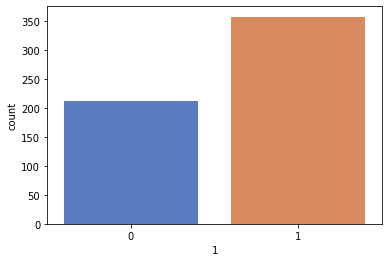

--------
 the fold number 1
The best number of neighbour is 9 with 0.9699248120300752 accuracy

 *KNN Confusion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


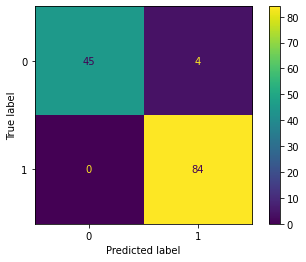


 *KNN Confusion Matrix


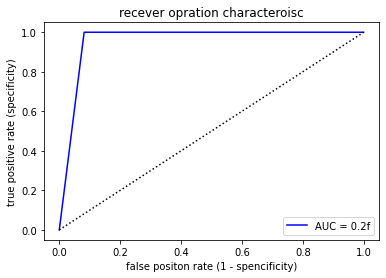


 Naive Bayes accuracy : 0.8345864661654135

 *GNB Confusion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


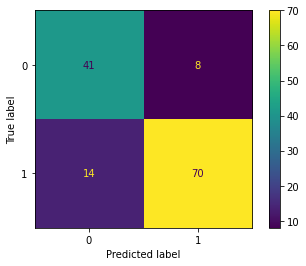



*GNB ROC


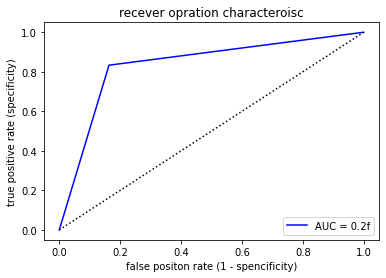


 SVC  accuracy : 0.9924812030075187


*SVC Confudion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


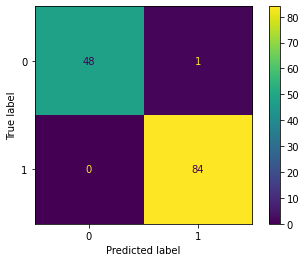



*SVC ROC


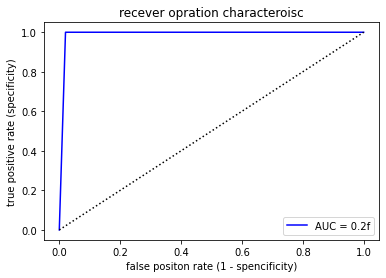


 MMD  accuracy : 0.9323308270676691


*MMD Confudion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


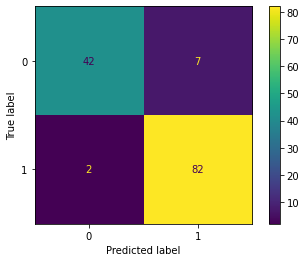



*MMD ROC


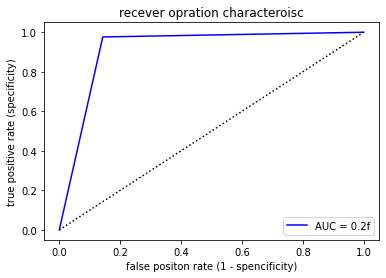


 RFC  accuracy : 0.9172932330827067


*RFC Confudion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


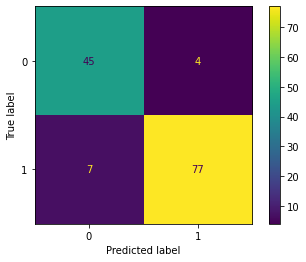



*RFC ROC


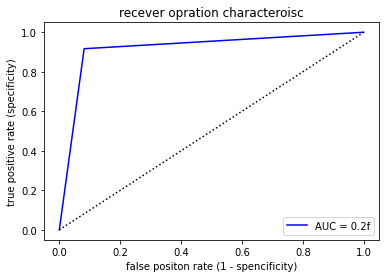

--------
 the fold number 2
The best number of neighbour is 7 with 0.9924812030075187 accuracy

 *KNN Confusion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


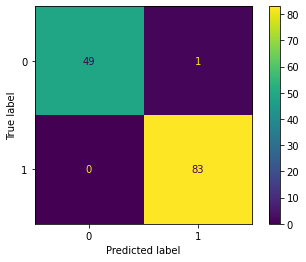


 *KNN Confusion Matrix


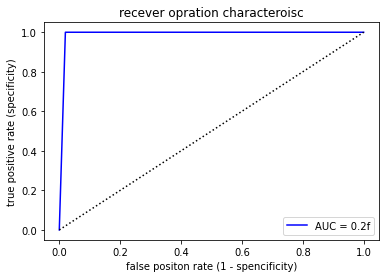


 Naive Bayes accuracy : 0.9022556390977443

 *GNB Confusion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


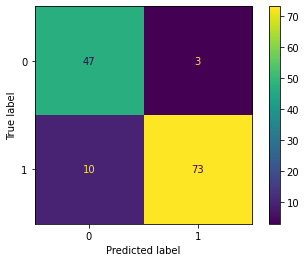



*GNB ROC


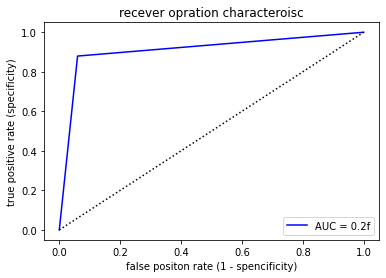


 SVC  accuracy : 0.9849624060150376


*SVC Confudion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


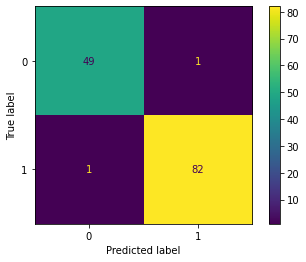



*SVC ROC


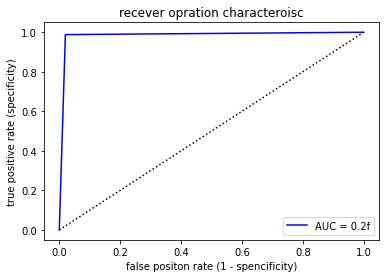


 MMD  accuracy : 0.9473684210526315


*MMD Confudion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


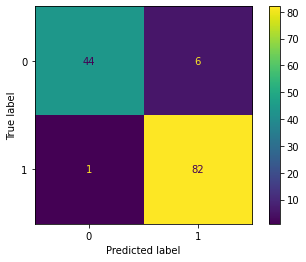



*MMD ROC


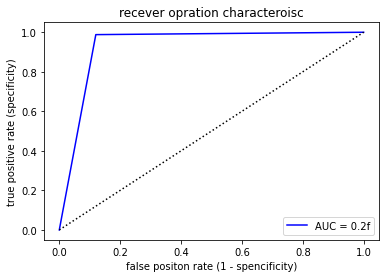


 RFC  accuracy : 0.9699248120300752


*RFC Confudion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


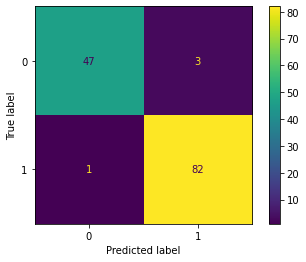



*RFC ROC


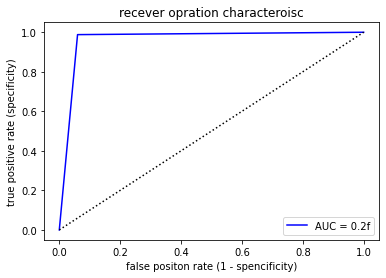

--------
 the fold number 3
The best number of neighbour is 4 with 0.9545454545454546 accuracy

 *KNN Confusion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


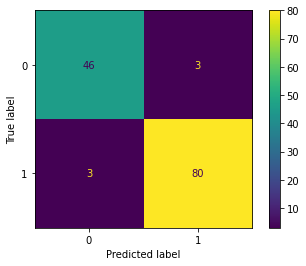


 *KNN Confusion Matrix


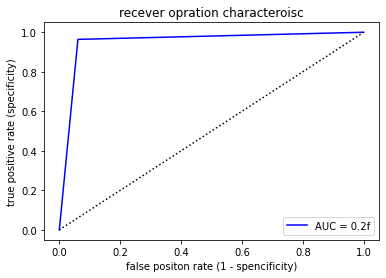


 Naive Bayes accuracy : 0.8636363636363636

 *GNB Confusion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


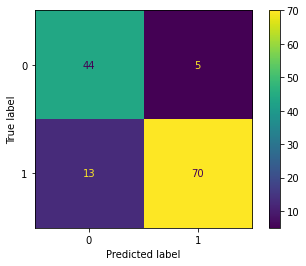



*GNB ROC


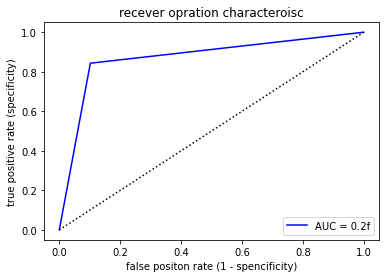


 SVC  accuracy : 0.9772727272727273


*SVC Confudion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


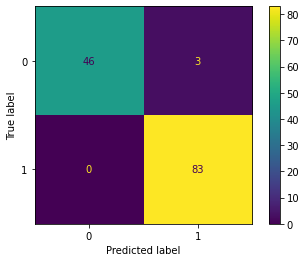



*SVC ROC


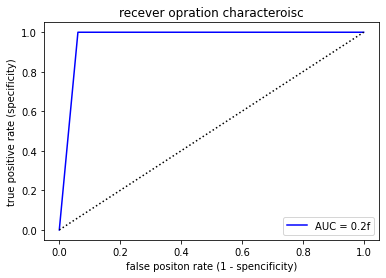


 MMD  accuracy : 0.9242424242424242


*MMD Confudion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


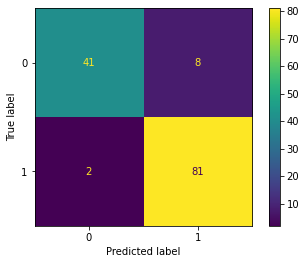



*MMD ROC


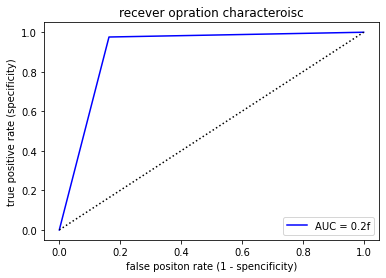


 RFC  accuracy : 0.9166666666666666


*RFC Confudion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


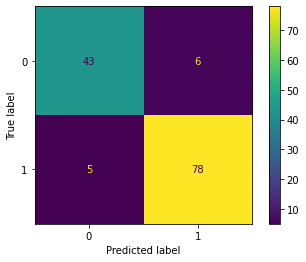



*RFC ROC


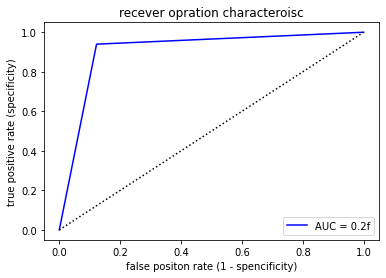


 RFC Classifier : 

 RFC Accuracy : 0.92


*RFC Confudion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


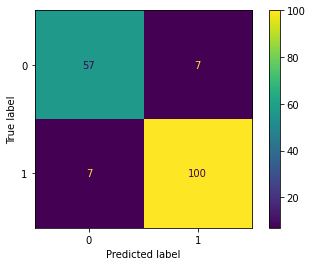



*RFC ROC


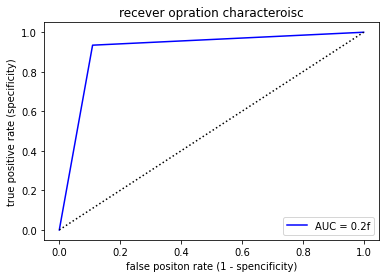


-------------------------------------------

 KNN Classifier : 

 KNNs Accuracy : 0.94


*KNNs Confudion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


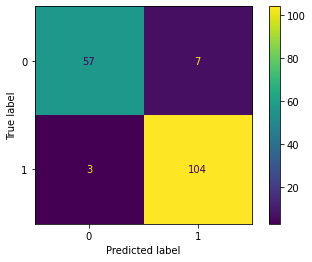



*KNNs ROC


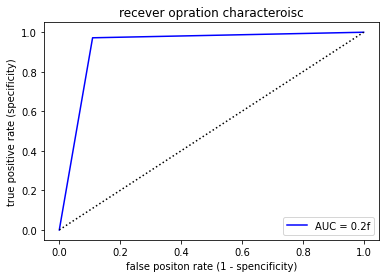


-------------------------------------------

 GNB Classifier : 

 KNNs Accuracy : 0.83


*KNNs Confudion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


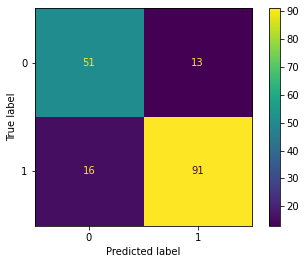



*KNNs ROC


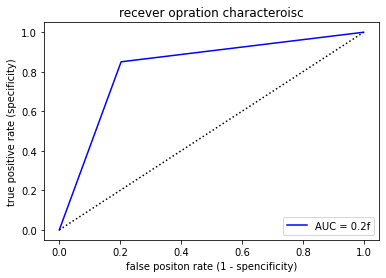


-------------------------------------------

 SVC Classifier : 

 SVC Accuracy : 0.96


*SVC Confudion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


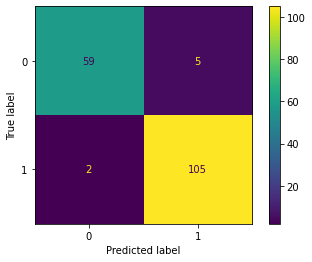



*SVCs ROC


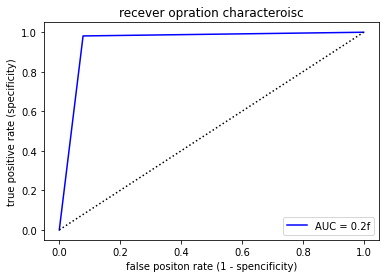


-------------------------------------------

 MMD Classifier : 

 KNNs Accuracy : 0.92


*KNNs Confudion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


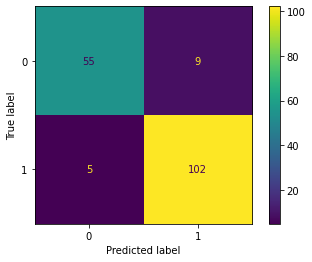



*KNNs ROC


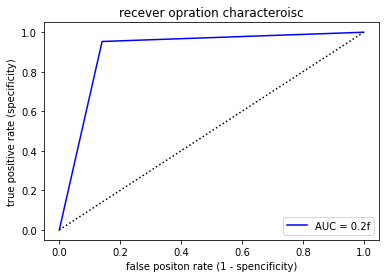


-------------------------------------------


In [30]:
showData(target, data)
run(target, data, 3)
